(365, 365)


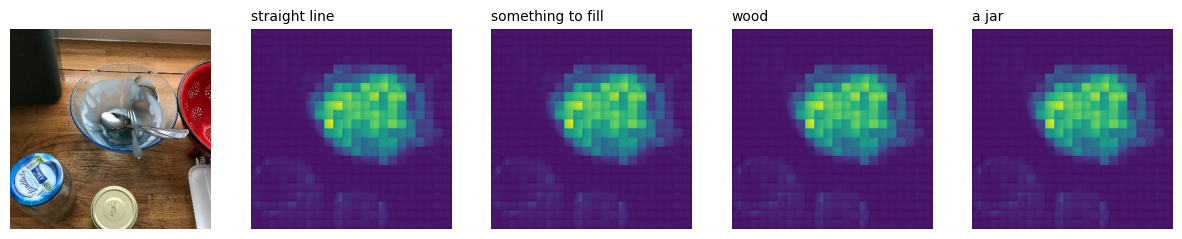

In [5]:
import torch
import requests

# ! wget https://owncloud.gwdg.de/index.php/s/ioHbRzFx6th32hn/download -O weights.zip
# ! unzip -d weights -j weights.zip
# ! pip install git+https://github.com/openai/CLIP.git
from models.clipseg import CLIPDensePredT
from PIL import Image
from torchvision import transforms
from matplotlib import pyplot as plt

# load model
model = CLIPDensePredT(version='ViT-B/16', reduce_dim=64)
model.eval();

# non-strict, because we only stored decoder weights (not CLIP weights)
model.load_state_dict(torch.load('weights/rd64-uni.pth', map_location=torch.device('cuda')), strict=False); #mmsm

# load and normalize image
input_image = Image.open('example_image.jpg')
print(input_image.size)
# or load from URL...
# image_url = 'https://farm5.staticflickr.com/4141/4856248695_03475782dc_z.jpg'
# input_image = Image.open(requests.get(image_url, stream=True).raw)

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    # transforms.Resize((352, 352)),
])
img = transform(input_image).unsqueeze(0)

prompts = ['straight line', 'something to fill', 'wood', 'a jar']

# predict
with torch.no_grad():
    preds = model(img.repeat(4,1,1,1), prompts)[0]

# visualize prediction
_, ax = plt.subplots(1, 5, figsize=(15, 4))
[a.axis('off') for a in ax.flatten()]
ax[0].imshow(input_image)
[ax[i+1].imshow(torch.sigmoid(preds[i][0])) for i in range(4)];
[ax[i+1].text(0, -15, prompts[i]) for i in range(4)];

Load and normalize `example_image.jpg`. You can also load through an URL.

In [5]:
# load and normalize image
input_image = Image.open('example_image.jpg')

# or load from URL...
# image_url = 'https://farm5.staticflickr.com/4141/4856248695_03475782dc_z.jpg'
# input_image = Image.open(requests.get(image_url, stream=True).raw)

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    transforms.Resize((352, 352)),
])
img = transform(input_image).unsqueeze(0)

Predict and visualize (this might take a few seconds if running without GPU support)

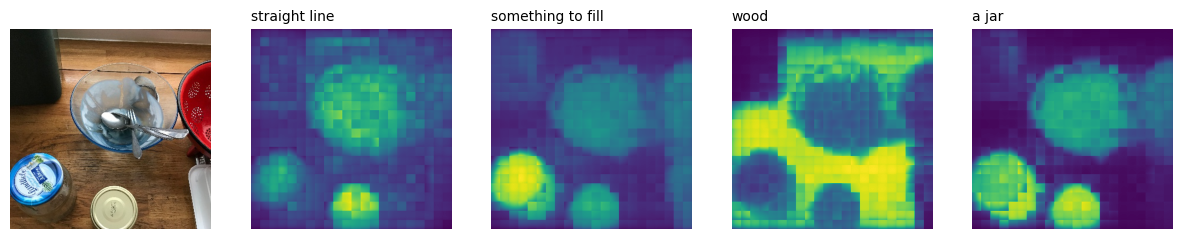

In [12]:
prompts = ['straight line', 'something to fill', 'wood', 'a jar']

# predict
with torch.no_grad():
    preds = model(img.repeat(4,1,1,1), prompts)[0]

# visualize prediction
_, ax = plt.subplots(1, 5, figsize=(15, 4))
[a.axis('off') for a in ax.flatten()]
ax[0].imshow(input_image)
[ax[i+1].imshow(torch.sigmoid(preds[i][0])) for i in range(4)];
[ax[i+1].text(0, -15, prompts[i]) for i in range(4)];

In [5]:
!pip install natsort

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


Video saved as output_video.mp4


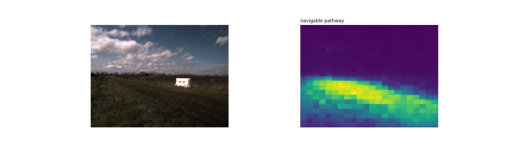

In [2]:
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from natsort import natsorted

# Specify the path to the folder containing images and the output video file
image_folder = 'images'
video_file = 'output_video.mp4'

# Specify the frame rate for the video
frame_rate = 10

# Get a list of all image files in the folder
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]

# Sort the image files naturally (e.g., img1, img2, ..., img10, img11, ...)
image_files = natsorted(image_files)

if not image_files:
    print("No images found in the specified folder.")
    exit()

# Read the first image to get the dimensions
first_image_path = os.path.join(image_folder, image_files[0])
first_image = cv2.imread(first_image_path)

if first_image is None:
    print(f"Failed to read the first image: {first_image_path}")
    exit()

# Convert the image from BGR to RGB
first_image = cv2.cvtColor(first_image, cv2.COLOR_BGR2RGB)
height, width, layers = first_image.shape

# Create a figure and axis for the animation
fig, ax = plt.subplots()

# Function to update each frame in the animation
def update(frame_number):
    img_path = os.path.join(image_folder, image_files[frame_number])
    img = cv2.imread(img_path)
    if img is None:
        print(f"Failed to read image: {img_path}")
        return

    # Convert the image from BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax.clear()
    ax.imshow(img)
    ax.axis('off')  # Hide the axis

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(image_files), repeat=False)

# Save the animation as an mp4 file
Writer = animation.writers['ffmpeg']
writer = Writer(fps=frame_rate, metadata=dict(artist='Me'), bitrate=1800)

ani.save(video_file, writer=writer)

print(f"Video saved as {video_file}")


error: OpenCV(4.6.0) /opencv-4.6.0/modules/highgui/src/window.cpp:1261: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvDestroyAllWindows'


In [ ]:
for filename in os.listdir(folder_path):
    # Create the full path to the file
    file_path = os.path.join(folder_path, filename)
    img = cv2.imread(file_path)